# Data analysis of the COVID-19 

# importing libraries

In [294]:

import pandas as pd  
import numpy as np  
import seaborn as sn
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import pearsonr
import statsmodels.api
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import folium
import pandas as pd
import os
import json

import pydot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Report data for the COVID-19

In [134]:
data_covid191=pd.read_csv("dataset/confirmed.csv")

In [135]:
data_covid19=data_covid191.groupby(['Country/Region']).sum().reset_index()

In [136]:
data_covid19.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


# Data preparation

In [137]:
data_covid19_cleaned1=data_covid19.melt(id_vars=['Country/Region','Lat','Long'],var_name="Date",value_name="Confirmed")
#data_covid19_death_cleaned1=data_covid19_death.melt(id_vars=['Country/Region','Lat','Long'],var_name="Date",value_name="Deaths")

In [138]:
data_covid19_cleaned1['Date']=pd.to_datetime(data_covid19_cleaned1['Date'])
#data_covid19_death_cleaned1['Date']=pd.to_datetime(data_covid19_death_cleaned1['Date'])

In [139]:
data_covid19_cleaned=data_covid19_cleaned1.groupby(['Country/Region','Date']).sum().reset_index()
#data_covid19_death_cleaned=data_covid19_death_cleaned1.groupby(['Country/Region','Date']).sum().reset_index()

In [140]:
data_covid19_cleaned['Date']=data_covid19_cleaned1['Date']
#data_covid19_death_cleaned1.head()

In [141]:
#data_covid19_death_cleaned1['Confirmed']=data_covid19_cleaned['Confirmed']

In [142]:
#plt.plot(data_covid19_death_cleaned1['Date'],data_covid19_death_cleaned1['Confirmed'])

In [143]:
#data_covid19_death_cleaned1.head()

# Humidity Data 

In [144]:
humidity=pd.read_csv("dataset/humidity.csv")

In [145]:
humidity.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,95.625000,95.625000,95.625000,95.625000,95.625000,95.625000,...,60.583333,48.791667,51.708333,64.541667,60.041667,68.791667,50.958333,55.625000,65.500000,67.583333
1,NaN,Albania,41.1533,20.1683,94.583333,94.583333,94.583333,94.583333,94.583333,94.583333,...,87.875000,72.250000,77.458333,71.250000,63.750000,53.166667,29.791667,31.083333,32.291667,37.458333
2,NaN,Algeria,28.0339,1.6596,8.833333,8.833333,8.833333,8.833333,8.833333,8.833333,...,7.500000,6.000000,12.958333,11.875000,10.541667,9.125000,13.791667,12.166667,12.041667,10.125000
3,NaN,Andorra,42.5063,1.5218,90.458333,90.458333,90.458333,90.458333,90.458333,90.458333,...,78.041667,75.500000,62.041667,49.916667,56.666667,73.500000,80.333333,78.083333,73.125000,68.083333
4,NaN,Angola,-11.2027,17.8739,78.041667,78.041667,78.041667,78.041667,78.041667,78.041667,...,79.958333,94.625000,88.583333,88.333333,85.125000,82.166667,84.291667,88.791667,81.750000,93.666667


In [146]:
humidity.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [147]:
data_humidity=humidity.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name="Date", 
        value_name="Humidity")

In [148]:
data_humidity.head()

,Province/State,Country/Region,Lat,Long,Date,Humidity
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,95.625000
1,NaN,Albania,41.1533,20.1683,1/22/20,94.583333
2,NaN,Algeria,28.0339,1.6596,1/22/20,8.833333
3,NaN,Andorra,42.5063,1.5218,1/22/20,90.458333
4,NaN,Angola,-11.2027,17.8739,1/22/20,78.041667


In [149]:
data_humidity_grouped=data_humidity.groupby(['Country/Region','Date']).mean().reset_index()

In [150]:
data_humidity_grouped.tail()

,Country/Region,Date,Lat,Long,Humidity
14795,Zimbabwe,4/5/20,-20.0,30.0,62.041667
14796,Zimbabwe,4/6/20,-20.0,30.0,51.833333
14797,Zimbabwe,4/7/20,-20.0,30.0,44.458333
14798,Zimbabwe,4/8/20,-20.0,30.0,80.541667
14799,Zimbabwe,4/9/20,-20.0,30.0,91.250000


In [151]:
data_humidity_grouped.shape

(14800, 5)

# Temperature data

In [152]:
temperature=pd.read_csv("dataset/temperature.csv")

In [153]:
temperature.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,9.908750,9.908750,9.908750,9.908750,9.908750,9.908750,...,10.455833,11.140417,14.014583,12.852083,13.083333,11.259167,11.865833,13.893333,13.997917,14.586250
1,NaN,Albania,41.1533,20.1683,6.367500,6.367500,6.367500,6.367500,6.367500,6.367500,...,6.099167,5.885833,8.513750,11.061250,11.970000,12.524583,12.906667,13.200833,14.398750,15.447083
2,NaN,Algeria,28.0339,1.6596,22.660417,22.660417,22.660417,22.660417,22.660417,22.660417,...,23.765000,24.420833,22.214167,21.802500,22.341250,23.265000,24.711250,25.454167,25.868333,27.485000
3,NaN,Andorra,42.5063,1.5218,5.491667,5.491667,5.491667,5.491667,5.491667,5.491667,...,6.207500,5.969583,5.847917,7.210417,7.164583,8.049583,8.455417,9.774583,9.976667,10.343333
4,NaN,Angola,-11.2027,17.8739,22.600833,22.600833,22.600833,22.600833,22.600833,22.600833,...,23.860417,21.522917,21.160833,21.392500,21.601667,22.343333,22.445417,21.167917,22.607917,20.617500


In [154]:
data_temperature=temperature.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name="Date", 
        value_name="temperature")

In [155]:
data_temperature_grouped=data_temperature.groupby(['Country/Region','Date']).mean().reset_index()

In [156]:
data_temperature_grouped.head()

,Country/Region,Date,Lat,Long,temperature
0,Afghanistan,1/22/20,33.0,65.0,9.90875
1,Afghanistan,1/23/20,33.0,65.0,9.90875
2,Afghanistan,1/24/20,33.0,65.0,9.90875
3,Afghanistan,1/25/20,33.0,65.0,9.90875
4,Afghanistan,1/26/20,33.0,65.0,9.90875


# Wind data

In [157]:
wind=pd.read_csv("dataset/wind_speed.csv")

In [158]:
data_wind=wind.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
        var_name="Date", 
        value_name="wind")

In [159]:
data_wind_grouped=data_wind.groupby(['Country/Region','Date']).mean().reset_index()

In [160]:
data_wind_grouped.head()

,Country/Region,Date,Lat,Long,wind
0,Afghanistan,1/22/20,33.0,65.0,1.265
1,Afghanistan,1/23/20,33.0,65.0,1.265
2,Afghanistan,1/24/20,33.0,65.0,1.265
3,Afghanistan,1/25/20,33.0,65.0,1.265
4,Afghanistan,1/26/20,33.0,65.0,1.265


# Merging the COVID-19 report with the daily weather conditions

In [161]:
#data_covid19_cleaned['Deaths']=data_covid19_death_cleaned1['Deaths']
data_covid19_cleaned['humidity']=data_humidity_grouped['Humidity']
data_covid19_cleaned['temperature']=data_temperature_grouped['temperature']
data_covid19_cleaned['wind']=data_wind_grouped['wind']

In [162]:
data_covid19_cleaned.head()

,Country/Region,Date,Lat,Long,Confirmed,humidity,temperature,wind
0,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
1,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
2,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
3,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
4,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265


In [163]:
#data_covid19_cleaned.set_index('Date').head()

In [164]:
data_covid19_cleaned.head()

,Country/Region,Date,Lat,Long,Confirmed,humidity,temperature,wind
0,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
1,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
2,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
3,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
4,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265


In [165]:
data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Tunisia') & (data_covid19_cleaned['Date'] == '2020-03-29')]

,Country/Region,Date,Lat,Long,Confirmed,humidity,temperature,wind


In [166]:
data_covid19_cleaned['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [167]:
data_covid19_cleaned_date=data_covid19_cleaned.groupby('Date').sum().reset_index()

In [168]:
data_covid19_cleaned_date.head()

,Date,Lat,Long,Confirmed,humidity,temperature,wind
0,2020-01-22,6633.1115,6854.9540,10654,13938.838768,2026.492101,392.510978
1,2020-01-23,4382.2335,1106.7170,26122,11406.063406,2833.183569,454.860362
2,2020-01-24,-1852.4245,-9178.7475,13282,12446.375000,4591.124583,1192.986250
3,2020-01-25,-16513.7885,93964.9585,113471,12972.784167,1247.744685,475.756558
4,2020-01-26,7188.9635,1196.3245,215026,12475.949275,1872.408641,534.281612


In [169]:
data_covid19_cleaned_date.shape

(80, 7)

In [170]:
data_covid19_cleaned_date.loc[(data_covid19_cleaned_date['Date'] == '2020-02-01')]

,Date,Lat,Long,Confirmed,humidity,temperature,wind
10,2020-02-01,862.0605,6435.448,165685,17024.416667,3843.535,234.5325


In [171]:
data_covid19_cleaned_date.loc[(data_covid19_cleaned_date['Date'] == '2020-03-01')]

,Date,Lat,Long,Confirmed,humidity,temperature,wind
39,2020-03-01,6928.21088,11902.23816,361512,10054.768116,1294.56462,607.251504


In [172]:
data_covid19_cleaned_date.loc[(data_covid19_cleaned_date['Date'] == '2020-04-01')]

,Date,Lat,Long,Confirmed,humidity,temperature,wind
70,2020-04-01,5052.813,13405.3522,221991,12297.0,2787.167083,350.575417


# Data vizualization 

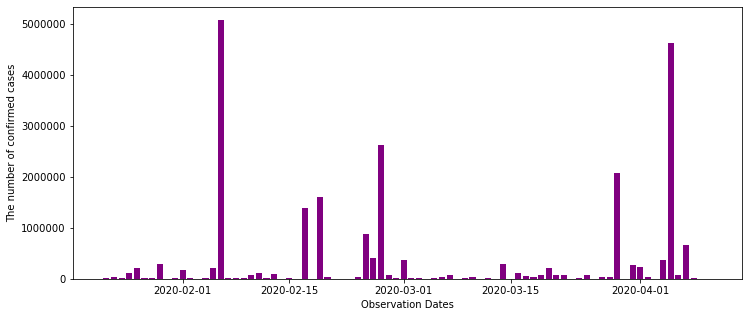

In [173]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 5))

# Add x-axis and y-axis
ax.bar(data_covid19_cleaned_date['Date'],
       data_covid19_cleaned_date['Confirmed'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Observation Dates",
       ylabel="The number of confirmed cases")

plt.show()

## Vizualizing the datapoints according to the weather conditions

In [174]:
data_covid19_cleaned.shape

(14800, 8)

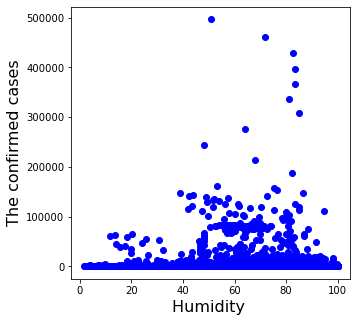

In [175]:
plt.figure(figsize=(5,5))
plt.plot( data_covid19_cleaned['humidity'],data_covid19_cleaned['Confirmed'], 'bo')
plt.xlabel('Humidity ', fontsize=16)
plt.ylabel('The confirmed cases', fontsize=16)
#plt.title('Time series of the number of confirmed cases')
plt.show()

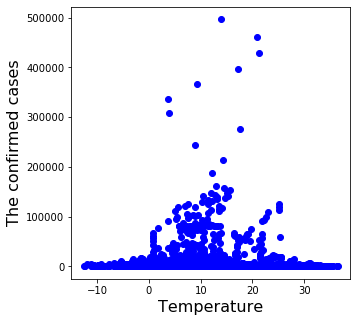

In [176]:
plt.figure(figsize=(5,5))
plt.plot( data_covid19_cleaned['temperature'],data_covid19_cleaned['Confirmed'], 'bo')
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('The confirmed cases', fontsize=16)
#plt.title('Time series of the number of confirmed cases')
plt.show()

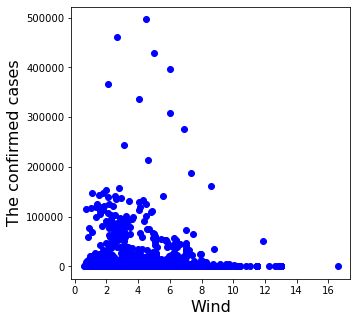

In [177]:
plt.figure(figsize=(5,5))
plt.plot( data_covid19_cleaned['wind'],data_covid19_cleaned['Confirmed'], 'bo')
plt.xlabel('Wind', fontsize=16)
plt.ylabel('The confirmed cases', fontsize=16)
#plt.title('Time series of the number of confirmed cases')
plt.show()

In [178]:
mask=(data_covid19_cleaned['Country/Region']=='Cote d\'Ivoire') & (data_covid19_cleaned['Date'] >= '2020-01-22') & (data_covid19_cleaned['Date'] <= '2020-03-29') 
country_one = data_covid19_cleaned.loc[mask]
country_one.mean()

Lat             7.540000
Long           -5.547100
Confirmed      51.287500
humidity       84.140104
temperature    26.213062
wind            2.807552
dtype: float64

In [179]:
data_vizua=data_covid19_cleaned1.groupby('Country/Region').sum()

In [180]:
date=data_vizua.drop('China').reset_index()

In [181]:
date.head()

,Country/Region,Lat,Long,Confirmed
0,Afghanistan,2640.000,5200.000,4903
1,Albania,3292.264,1613.464,5751
2,Algeria,2242.712,132.768,18293
3,Andorra,3400.504,121.744,7829
4,Angola,-896.216,1429.912,186


In [182]:
#data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Canada') & (data_covid19_cleaned['Date'] == '2020-03-30')]

In [183]:
fig = px.pie(date, values = 'Confirmed',names='Country/Region', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = True,
        showcoastlines = True,
    ))
fig.show()
plt.savefig('risk_countries.png')

<Figure size 432x288 with 0 Axes>

In [184]:
data_covid19_cleaned['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

In [185]:
Thailand=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Thailand')]
Japan=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Japan')]
#Hong_Kong=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Tunisia')]
Taiwan=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Taiwan*')]
South_Korea=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Korea, South')]
United_States=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'US')]
Malaysia=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Malaysia')]
Singapore=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Singapore')]
Vietnam=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Vietnam')]
Australia=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Australia')]
Indonesia=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Indonesia')]
Cambodia=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Cambodia')]
#Myanmar=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Egypt')]
Netherlands=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Netherlands')]
Maldives=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Maldives')]

Sri_Lanka=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Sri Lanka')]
Egypt=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Egypt')]
Turkey=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Turkey')]
Spain=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Spain')]
India=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'India')]


New_Zeland=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'New Zealand')]
France=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'France')]
Russia=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Russia')]
Italy=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Italy')]
Philippines=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Philippines')]
Germany=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Germany')]
Canada=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Canada')]
United_Kingdom=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'United Kingdom')]
United_Arab_Emirates=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'United Arab Emirates')]

In [186]:
plt.figure(figsize=(14, 7))
plt.plot(plot_Senegal['Date'], Thailand['Confirmed']) 
plt.plot(plot_Senegal['Date'], Japan['Confirmed']) 
plt.plot(plot_Senegal['Date'], Taiwan['Confirmed']) 
plt.plot(plot_Senegal['Date'], South_Korea['Confirmed']) 
plt.plot(plot_Senegal['Date'], United_States['Confirmed']) 

plt.plot(plot_Senegal['Date'], Malaysia['Confirmed']) 
plt.plot(plot_Senegal['Date'], Singapore['Confirmed']) 
plt.plot(plot_Senegal['Date'], Vietnam['Confirmed']) 
plt.plot(plot_Senegal['Date'], Australia['Confirmed']) 
plt.plot(plot_Senegal['Date'], Indonesia['Confirmed']) 

plt.plot(plot_Senegal['Date'], Netherlands['Confirmed']) 
plt.plot(plot_Senegal['Date'], Maldives['Confirmed']) 
plt.plot(plot_Senegal['Date'], Sri_Lanka['Confirmed']) 
plt.plot(plot_Senegal['Date'], Egypt['Confirmed']) 
plt.plot(plot_Senegal['Date'], Turkey['Confirmed']) 
plt.plot(plot_Senegal['Date'], Spain['Confirmed']) 
plt.plot(plot_Senegal['Date'], India['Confirmed']) 
plt.plot(plot_Senegal['Date'], New_Zeland['Confirmed']) 
plt.plot(plot_Senegal['Date'], France['Confirmed']) 
plt.plot(plot_Senegal['Date'], Russia['Confirmed']) 
 
plt.plot(plot_Senegal['Date'], Italy['Confirmed']) 
plt.plot(plot_Senegal['Date'], Philippines['Confirmed']) 
plt.plot(plot_Senegal['Date'], Germany['Confirmed']) 
plt.plot(plot_Senegal['Date'], United_Kingdom['Confirmed']) 
plt.plot(plot_Senegal['Date'], United_Arab_Emirates['Confirmed']) 
plt.grid()
#plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Observation date', size=20)
plt.ylabel('Infected cases', size=20)

plt.legend(['Thailand','Japan','Taiwan','South_Korea','United_States','Malaysia','Singapore','Vietnam','Australia','Indonesia','Netherlands', 'Maldives', 'Sri_Lanka', 'Egypt', 'Turkey', 'Spain', 'India', 'New_Zeland', 'France', 'Russia','Italy','Philippines','United_Kingdom','United_Arab_Emirates'],loc=0)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

NameError: name 'plot_Senegal' is not defined

<Figure size 1008x504 with 0 Axes>

In [187]:
data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Ghana') & (data_covid19_cleaned['Date'] == '2020-03-15') ]

,Country/Region,Date,Lat,Long,Confirmed,humidity,temperature,wind


In [188]:
mask=(data_covid19_cleaned['Country/Region']=='Ghana') & (data_covid19_cleaned['Date'] >= '2020-01-22') & (data_covid19_cleaned['Date'] <= '2020-03-15') 
country_one = data_covid19_cleaned.loc[mask]
country_one.mean()

Lat             7.946500
Long           -1.023200
Confirmed      46.737500
humidity       68.408854
temperature    29.592766
wind            3.484266
dtype: float64

## Vizualizing Africa

In [189]:
plot_Senegal=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Senegal')]
plot_Nigeria=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Nigeria')]
plot_Tunisia=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Tunisia')]
plot_Algeria=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Algeria')]
plot_Egypt=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Egypt')]
plot_South_Africa=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'South Africa')]
plot_cote=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Cote d\'Ivoire')]
plot_Morocco=data_covid19_cleaned.loc[(data_covid19_cleaned['Country/Region'] == 'Morocco')]

In [190]:
plot_Senegal.head()

,Country/Region,Date,Lat,Long,Confirmed,humidity,temperature,wind
11680,Senegal,2020-03-25,14.4974,-14.4524,0,17.5,29.062083,5.421667
11681,Senegal,2020-03-25,14.4974,-14.4524,0,17.5,29.062083,5.421667
11682,Senegal,2020-03-25,14.4974,-14.4524,0,17.5,29.062083,5.421667
11683,Senegal,2020-03-25,14.4974,-14.4524,0,17.5,29.062083,5.421667
11684,Senegal,2020-03-25,14.4974,-14.4524,0,17.5,29.062083,5.421667


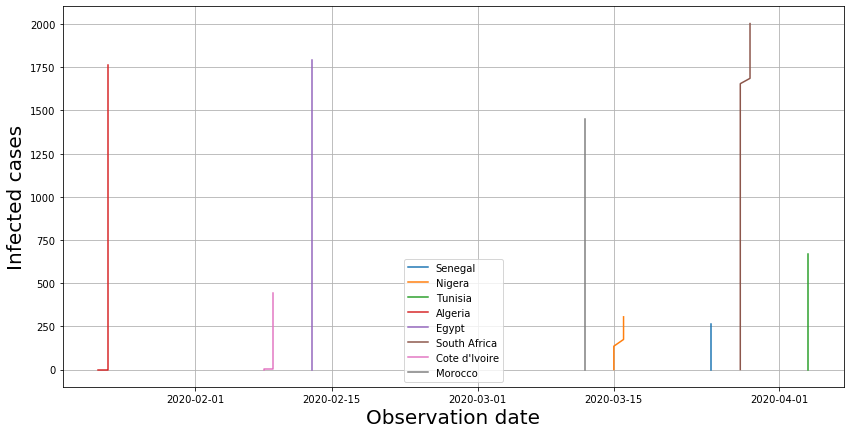

In [191]:
plt.figure(figsize=(14, 7))
plt.plot(plot_Senegal['Date'], plot_Senegal['Confirmed'])
plt.plot(plot_Nigeria['Date'], plot_Nigeria['Confirmed'])
plt.plot(plot_Tunisia['Date'], plot_Tunisia['Confirmed'])
plt.plot(plot_Algeria['Date'], plot_Algeria['Confirmed'])
plt.plot(plot_Egypt['Date'], plot_Egypt['Confirmed'])
plt.plot(plot_South_Africa['Date'], plot_South_Africa['Confirmed'])
plt.plot(plot_cote['Date'],plot_cote['Confirmed'])
plt.plot(plot_Morocco['Date'], plot_Morocco['Confirmed'])                
#plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Observation date', size=20)
plt.ylabel('Infected cases', size=20)
plt.legend(['Senegal', 'Nigera', 'Tunisia', 'Algeria', 'Egypt', 'South Africa','Cote d\'Ivoire', 'Morocco'])
plt.xticks(size=10)
plt.yticks(size=10)
plt.grid()
plt.show()


In [192]:
data_covid_africa=pd.read_csv("dataset/africa_dataset.csv")

In [193]:
data_covid_africa

,Countries,lockdown date,Confirmed_cases,temperature,humidity,wind velocity,population density,GDP_country,Risk_country
0,Senegal,24/03/2020,83,29.22,17.41,5.38,82,24130,0.00
1,Nigeria,23/03/2020,51,28.47,65.24,1.95,218,397270,0.00
2,Tunisia,20/03/2020,173,17.92,62.81,5.43,72,39861,0.00
3,Algeria,24/03/2020,24,22.38,10.65,5.76,18,180689,0.00
4,Egypt,24/03/2020,402,21.77,19.61,4.17,100,250895,0.43
5,Morocco,16/03/2020,29,11.53,67.56,2.15,80,118495,0.00
6,SA,26/03/2020,927,24.08,43.02,4.11,48,368288,0.00
7,Cote d’Ivoire,29/03/2020,165,25.93,84.71,2.83,83,43007,0.00


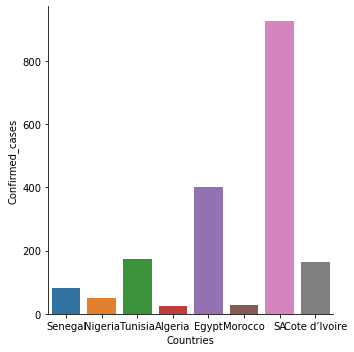

In [194]:
#sns.catplot(data_covid_africa['Countries'],data_covid_africa['Confirmed_cases'])
sns.catplot(x="Countries",y="Confirmed_cases",kind='bar',data=data_covid_africa)

# Data analysis with the sample dataset

In [195]:
dataframe_cov=pd.read_csv("dataset/high_risk_factor_data_temp.csv")

In [196]:
dataframe_cov.shape

(52, 11)

In [197]:
dataframe_cov['Total_testing'].isnull().sum()

23

In [198]:
#dataframe_cov['Total_testing'].fillna(mean)

In [288]:
dataframe_cov['Confirmed_log']=np.log10(dataframe_cov['Confirmed_cases'])

In [289]:
dataframe_cov=dataframe_cov.fillna(0)

In [290]:
corr, _ = pearsonr(dataframe_cov['Temperature'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Temperature and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Temperature and the number of confirmed cases is: -0.249


In [291]:
corr, _ = pearsonr(dataframe_cov['Risk'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Risk and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Risk and the number of confirmed cases is: 0.066


In [292]:
corr, _ = pearsonr(dataframe_cov['Humidity'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Humidity and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Humidity and the number of confirmed cases is: 0.051


In [293]:
corr, _ = pearsonr(dataframe_cov['Wind'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Wind and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Wind and the number of confirmed cases is: 0.047


In [205]:
corr, _ = pearsonr(dataframe_cov['Population density'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Population density and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Population density and the number of confirmed cases is: -0.132


In [206]:
dataframe_cov.columns

Index(['Country', 'Risk', 'Confirmed_cases', 'Lockdown_date', 'Total_testing',
       'Temperature', 'Humidity', 'Wind', 'Population density', 'BMI', 'GDP',
       'Confirmed_log'],
      dtype='object')

In [207]:
#dataframe_final['Confirmed_log']=np.log10(dataframe_final['Confirmed_cases'])

In [208]:
dataframe_cov['Lockdown_date']=pd.to_datetime(dataframe_cov['Lockdown_date'])

In [209]:
date=[]
for i in range(len(dataframe_cov)):
    date.append('2020-01-22')

In [210]:
start_date=pd.DataFrame(date)

In [211]:
dataframe_cov['start_date']=pd.to_datetime(date)

In [212]:
dataframe_cov.head()

,Country,Risk,Confirmed_cases,Lockdown_date,Total_testing,Temperature,Humidity,Wind,Population density,BMI,GDP,Confirmed_log,start_date
0,Algeria,0.00,24,2020-03-24,0,22.38,10.65,5.76,18.41,26.2,180689,1.380211,2020-01-22
1,Argentina,0.00,128,2020-03-20,0,26.48,45.29,7.02,41.00,27.7,518475,2.107210,2020-01-22
2,Australia,3.37,2044,2020-03-24,131500,18.73,69.17,3.72,3.00,27.2,1432195,3.310481,2020-01-22
3,Austria,0.00,1332,2020-03-17,10278,-3.59,62.57,1.77,106.00,25.4,455737,3.124504,2020-01-22
4,Belgium,0.00,559,2020-03-13,125852,5.80,53.10,5.13,376.00,25.5,531767,2.747412,2020-01-22


In [213]:
dataframe_cov['days']=dataframe_cov['Lockdown_date']-dataframe_cov['start_date']

In [214]:
dataframe_final=dataframe_cov

In [215]:

dataframe_final['days']=dataframe_final['days']/np.timedelta64(1,'D')
 

In [216]:
dataframe_final.head()

,Country,Risk,Confirmed_cases,Lockdown_date,Total_testing,Temperature,Humidity,Wind,Population density,BMI,GDP,Confirmed_log,start_date,days
0,Algeria,0.00,24,2020-03-24,0,22.38,10.65,5.76,18.41,26.2,180689,1.380211,2020-01-22,62.0
1,Argentina,0.00,128,2020-03-20,0,26.48,45.29,7.02,41.00,27.7,518475,2.107210,2020-01-22,58.0
2,Australia,3.37,2044,2020-03-24,131500,18.73,69.17,3.72,3.00,27.2,1432195,3.310481,2020-01-22,62.0
3,Austria,0.00,1332,2020-03-17,10278,-3.59,62.57,1.77,106.00,25.4,455737,3.124504,2020-01-22,55.0
4,Belgium,0.00,559,2020-03-13,125852,5.80,53.10,5.13,376.00,25.5,531767,2.747412,2020-01-22,51.0


In [217]:
corr, _ = pearsonr(dataframe_cov['days'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Wind and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Wind and the number of confirmed cases is: -0.246


In [218]:
corr, _ = pearsonr(dataframe_cov['GDP'], dataframe_cov['Confirmed_log'])
print('The correlation between the variable Temperature and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Temperature and the number of confirmed cases is: 0.530


# Splitting into Features and Target 

In [219]:
Y=dataframe_final['Confirmed_log']
X=dataframe_final[['days','Risk','Temperature','Humidity','Wind','Population density','GDP']].avalues

# Scaling the features

In [220]:
#from sklearn import preprocessing
#standardized_X = preprocessing.scale(X)

In [221]:
#x = sm.add_constant(X)  
#model = sm.OLS(Y, x).fit()
#predictions = model.predict(x) 

#print_model = model.summary()
#print(print_model)

# Splitting into training and testing dataset

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Tuning  Hyperameters

In [223]:
testing1=pd.read_csv("dataset/owid-covid-data.csv")

In [295]:
testing1.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand', 'tests_units'],
      dtype='object')

In [ ]:
group = data.groupby('date')['date', 'total_cases', 'total_deaths'].sum().reset_index()

fig = px.line(group, x="date", y="confirmed", 
              title="Worldwide Confirmed Cases Over Time")

fig.show()

fig = px.line(group, x="date", y="deaths", 
              title="Worldwide Deaths Over Time")

fig.show()

In [224]:
testing1.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [225]:
mask=(testing1['date'] == '2020-04-10') 
testing = testing1.loc[mask]
country=testing.fillna(0)

In [252]:
corr, _ = pearsonr(country['total_cases'], country['total_tests'])
print('The correlation between the variable Temperature and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Temperature and the number of confirmed cases is: 0.256


In [253]:
country.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
14751,YEM,Yemen,2020-04-10,1,1,0,0,0.034,0.034,0.000,0.000,0.0,0.0,0.000,0.000,0
14820,ZAF,South Africa,2020-04-10,1934,89,18,0,32.609,1.501,0.303,0.000,73028.0,4154.0,1.231,0.070,units unclear
14867,ZMB,Zambia,2020-04-10,39,0,1,0,2.121,0.000,0.054,0.000,0.0,0.0,0.000,0.000,0
14913,ZWE,Zimbabwe,2020-04-10,11,0,3,1,0.740,0.000,0.202,0.067,463.0,25.0,0.031,0.002,tests performed
15039,0,World,2020-04-10,1563819,87027,96669,7445,200.623,11.165,12.402,0.955,0.0,0.0,0.000,0.000,0


In [254]:
data_covid19_confirmed_top=country.nlargest(100, ['total_tests']) 

In [256]:
data_covid19_confirmed_top.to_csv('data_covid19_confirmed_top.csv')

In [257]:
data_frame1=pd.read_csv("data_covid19_confirmed_top.csv")

In [258]:
testing_dataframe=data_frame1.sort_values(by=['location'])

In [260]:
corr, _ = pearsonr(testing_dataframe['total_cases'], testing_dataframe['total_tests'])
print('The correlation between the variable Temperature and the number of confirmed cases is: %.3f' % corr)

The correlation between the variable Temperature and the number of confirmed cases is: 0.896


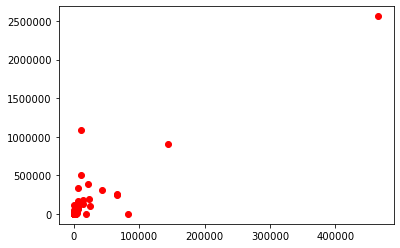

In [262]:
plt.plot(testing_dataframe['total_cases'],testing_dataframe['total_tests'],'ro')

In [263]:
#data_covid19_confirmed_top1['location'].unique()

In [266]:
data_covid19_cleaned.head()

,Country/Region,Date,Lat,Long,Confirmed,humidity,temperature,wind
0,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
1,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
2,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
3,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265
4,Afghanistan,2020-01-22,33.0,65.0,0,95.625,9.90875,1.265


In [267]:
mask=(data_covid19_cleaned['Date'] >= '2020-01-22') & (data_covid19_cleaned['Date'] <= '2020-04-10') 
country_one = data_covid19_cleaned.loc[mask]

In [268]:
data_grouped=data_covid19_cleaned.groupby('Country/Region').mean().reset_index()

In [269]:
data_grouped.tail()

,Country/Region,Lat,Long,Confirmed,humidity,temperature,wind
180,West Bank and Gaza,31.952200,35.233200,45.0750,59.749479,12.830021,1.968177
181,Western Sahara,24.215500,-12.885800,0.3000,26.316886,21.154095,4.099726
182,Yemen,15.552727,48.516388,0.0125,NaN,NaN,NaN
183,Zambia,-15.416700,28.283300,7.2750,75.611458,20.803490,3.300943
184,Zimbabwe,-20.000000,30.000000,1.9125,60.620833,23.057047,2.178651


In [270]:
#data_grouped['Country/Region'].unique()

In [271]:
countries=['Afghanistan', 'Albania', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'Ghana', 'Greece',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Israel',
       'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Myanmar', 'Nepal',
       'New Zealand', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Senegal', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa',
       'South Korea', 'Switzerland', 'Taiwan', 'Thailand', 'Tunisia',
       'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Vietnam',
       'Zimbabwe']



total=[]

for i in range(len(data_grouped)):
    #print(data_grouped['Country/Region'][i])
    for k in countries:
        if data_grouped['Country/Region'][i]==k:
            total.append([data_grouped['Country/Region'][i],data_grouped['temperature'][i],data_grouped['humidity'][i],data_grouped['wind'][i]])
            
dataframe= pd.DataFrame (total, columns = ['Country','temperature','humidity','wind'])

In [272]:
dataframe['Country'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Ghana', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'New Zealand', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Senegal', 'Serbia', 'Slovakia', 'Slovenia', 'South 

In [273]:
testing_dataframe['location'].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic', 'Chile', 'China',
       'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Ecuador', 'Estonia', 'Finland', 'Ghana', 'Greece',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Israel',
       'Italy', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Myanmar', 'Nepal',
       'New Zealand', 'Norway', 'Paki

In [275]:
aa=['Afghanistan', 'Albania', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Ghana', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'New Zealand', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Senegal', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa',
       'Switzerland', 'Thailand', 'Tunisia', 'Turkey', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Vietnam', 'Zimbabwe']
len(aa)

88

In [276]:
dataframe.to_csv('dataframe.csv')

In [277]:
selected_country=['Afghanistan', 'Albania', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon',
       'Canada', 'Central African Republic', 'Chile', 'China', 'Colombia',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Ghana', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'New Zealand', 'Norway', 'Pakistan', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
       'Senegal', 'Serbia', 'Slovakia', 'Slovenia', 'South Africa',
       'Switzerland', 'Thailand', 'Tunisia', 'Turkey', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay',
       'Vietnam', 'Zimbabwe']

total=[]

for i in range(len(testing_dataframe)):
    #print(data_grouped['Country/Region'][i])
    for k in selected_country:
        if testing_dataframe['location'][i]==k:
            total.append([testing_dataframe['location'][i],testing_dataframe['total_cases'][i],testing_dataframe['total_tests'][i]])
            
dataframe_2= pd.DataFrame (total, columns = ['location','total_cases','total_tests'])

In [278]:
dataframe_2.columns

Index(['location', 'total_cases', 'total_tests'], dtype='object')

In [280]:
testing_dataset=dataframe_2.sort_values(by=['location']).reset_index()

In [281]:
testing_dataset.head()

,index,location,total_cases,total_tests
0,63,Afghanistan,484,0.0
1,65,Albania,409,0.0
2,66,Andorra,583,0.0
3,64,Angola,19,0.0
4,69,Antigua and Barbuda,19,0.0


In [282]:
dataframe.head()

,Country,temperature,humidity,wind
0,Afghanistan,10.282745,89.434375,1.362359
1,Albania,7.967026,82.040693,1.656398
2,Andorra,5.750118,86.025272,1.006687
3,Angola,22.472328,79.405208,1.339839
4,Antigua and Barbuda,25.210521,80.880208,8.098062


In [283]:
dataframe['total_tests']=testing_dataset['total_tests']
dataframe['total_cases']=testing_dataset['total_cases']

In [284]:
dataframe.head()

,Country,temperature,humidity,wind,total_tests,total_cases
0,Afghanistan,10.282745,89.434375,1.362359,0.0,484
1,Albania,7.967026,82.040693,1.656398,0.0,409
2,Andorra,5.750118,86.025272,1.006687,0.0,583
3,Angola,22.472328,79.405208,1.339839,0.0,19
4,Antigua and Barbuda,25.210521,80.880208,8.098062,0.0,19


In [286]:
X2=dataframe[['temperature','humidity','wind','total_tests']].values
Y2=dataframe[['total_cases']].values

In [287]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.25, random_state = 1)

# Training the Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0   )
regressor.fit( X_train, y_train)

y_pred = regressor.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_pred) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.2508415650825184